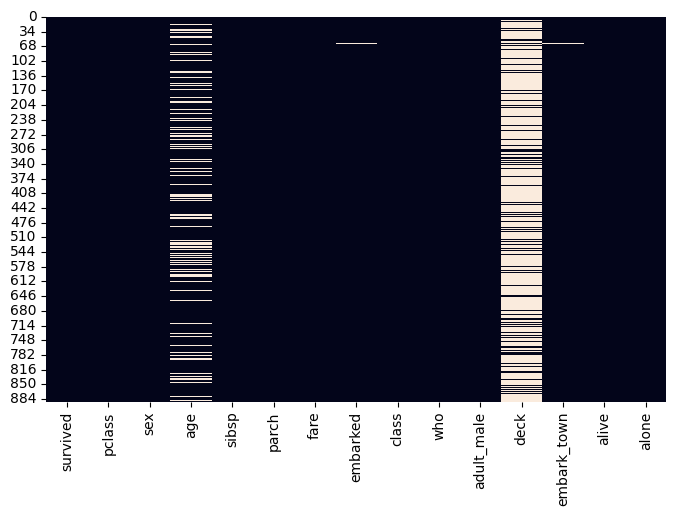

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load titanic dataset
data = sns.load_dataset('titanic')

# Visualize the data
plt.figure(figsize=(8, 5))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [10]:
print(data.isnull().sum()[data.isnull().sum() > 0])


age            177
embarked         2
deck           688
embark_town      2
dtype: int64


In [9]:
round(data.isnull().sum() / len(data) * 100 ,3).sort_values(ascending=False)

deck           77.217
age            19.865
embarked        0.224
embark_town     0.224
survived        0.000
pclass          0.000
sex             0.000
sibsp           0.000
parch           0.000
fare            0.000
class           0.000
who             0.000
adult_male      0.000
alive           0.000
alone           0.000
dtype: float64

In [99]:
data['age'] = data['age'].fillna(data['age'].median())
data['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [100]:
data.drop("deck", axis=1, inplace=True)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [101]:
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])
data['embark_town'] = data['embark_town'].fillna(data['embark_town'].mode()[0])
data.isnull().sum()
# data['embark_town'].mode()
# data['embark_town'].value_counts() 

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
# load titanic dataset
data = sns.load_dataset('titanic')

# calculate missing values
print("----------------------------------------")
print(f"Missing values in each column:\n{data.isnull().sum().sort_values(ascending=False)}")
print("----------------------------------------")
print(f"Percentage of missing values in each column:\n{round(data.isnull().sum() / len(data) * 100, 2).sort_values(ascending=False)}")

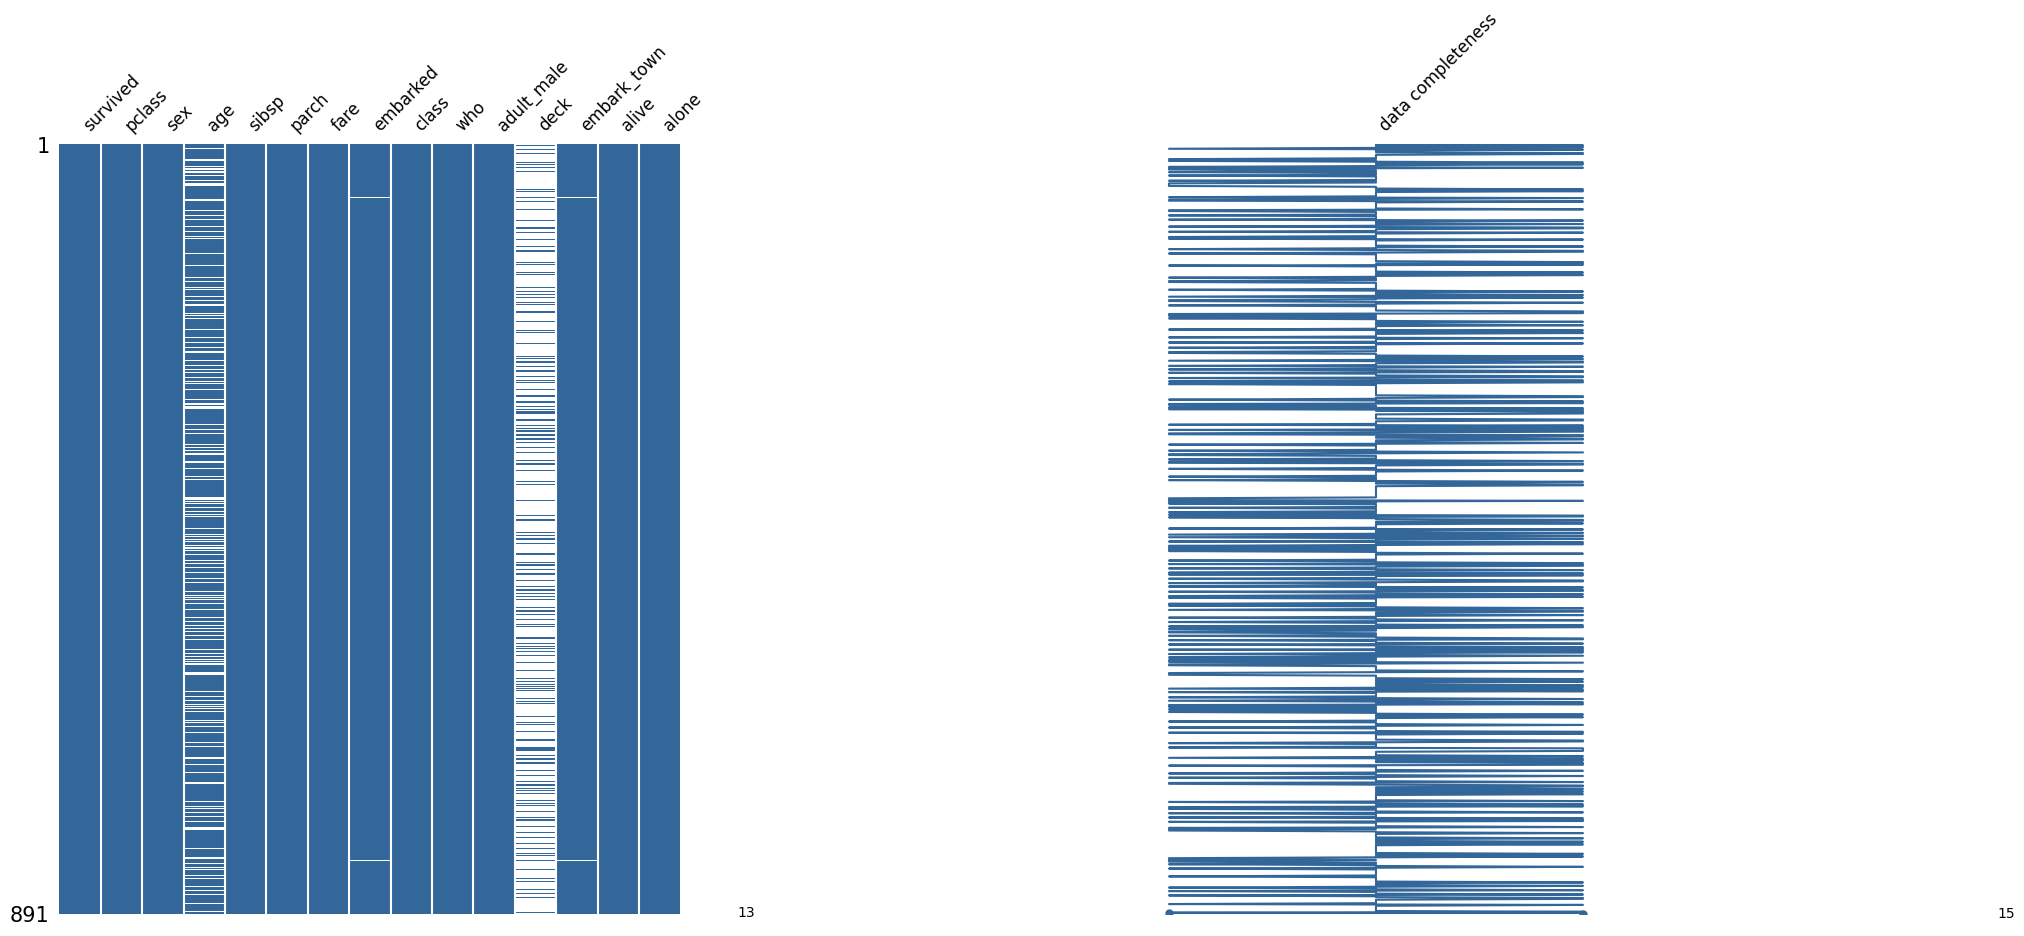

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# load titanic dataset
data = sns.load_dataset('titanic')
# Visualize the data
msno.matrix(data,labels=True, fontsize=12, width_ratios=(2, 4), color=(0.2, 0.4, 0.6))
plt.show()

In [11]:
from sklearn.impute import SimpleImputer

data = sns.load_dataset('titanic')
# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')
# Fill missing values in the age column
# data['age'] = imputer.fit_transform(data['age'].values.reshape(-1, 1))
data['age'] = imputer.fit_transform(data[['age']])
# Check for missing values
data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer2 = IterativeImputer()
data['age'] = imputer2.fit_transform(data[['age']])
data.isnull().sum()


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64